In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#import csv file
creative = pd.read_csv('creatives_c.csv')
creative.head()


,Campaign name,Ad Set Name,Ad name,Reach,Impressions,Frequency,Amount spent (EUR),"CPM (cost per 1,000 impressions)",Mobile app installs,Adds to cart,Cost per app install,Mobile app purchases,Preview link,CTR (link click-through rate),CPI,Reporting starts,Reporting ends
0,MAI - App Installs - DE - HH - iOS - AO - V02,16.01 - 50% - 1P data - AUTO - HH,DCO - VIDEO - Various - Jonas - APP - DE - V01,315265,1132242,3.591398,7703.36,6.803634,2136,189.0,3.606442,101.0,https://www.facebook.com/?feed_demo_ad=2385308...,0.520472,3.606442,2023-01-01,2023-06-19
1,MAI - Installs - DE - CGN - iOS - Launch - V28...,CGN - V28.02.2023,Video-C2-V1-Laura-369-Deliverydoor-CGN,92735,417229,4.499154,3675.72,8.809838,725,166.0,5.069959,84.0,https://www.facebook.com/?feed_demo_ad=2385367...,0.447236,5.069959,2023-01-01,2023-06-19
2,MAI - Installs - DE - CGN - Android - Launch -...,CGN - V28.02.2023,Video-C2-V1-Laura-369-Deliverydoor-CGN,51344,312964,6.095435,3614.52,11.549316,571,300.0,6.330158,48.0,https://www.facebook.com/?feed_demo_ad=2385367...,0.415383,6.330158,2023-01-01,2023-06-19
3,MAI - Installs - DE - HH+CGN - iOS - AO - V25....,Videos - DCO | ALL CITIES,DCO - VIDEOS,194370,475482,2.446273,3569.15,7.506383,233,51.0,15.318240,29.0,https://www.facebook.com/?feed_demo_ad=2385495...,0.204634,15.318240,2023-01-01,2023-06-19
4,AEO - Purchase - DE - HH+CGN - iOS - AO - V08....,08.03 - Various - 1P data - AUTO - HH,Video-C31-V2-Laura-369-50%,159773,366599,2.294499,3496.03,9.536387,454,40.0,7.700507,19.0,https://www.facebook.com/?feed_demo_ad=2385376...,0.431261,7.700507,2023-01-01,2023-06-19


In [43]:
#make a copy of the data
creative_copy = creative.copy()

#drop the columns that are not needed
creative_copy.drop(['Preview link', 'Reporting starts', 'Reporting ends'], axis=1, inplace=True)

#making the headers lowercase and replacing spaces with underscores
creative_copy.columns = creative_copy.columns.str.lower().str.replace(' ', '_')
creative_copy.head()


#renaming headers to make them more readable
creative_copy.rename(columns={'amount_spent_(eur)': 'spent', 'cpm_(cost_per_1,000_impressions)': 'cpm', 'ctr_(link_click-through_rate)': 'ctr'}, inplace=True)

#correcting the decimal point across the data
creative_copy.round(2)

#checking for missing values in the data
creative_copy.isnull().sum()

#filling missing values with 0
creative_copy.fillna(0, inplace=True)

# Convert all numeric columns to float
numeric_columns = creative_copy.select_dtypes(include=['int','int64'])
creative_copy[numeric_columns.columns] = numeric_columns.astype(float)

creative_copy.describe()



,reach,impressions,frequency,spent,cpm,mobile_app_installs,adds_to_cart,cost_per_app_install,mobile_app_purchases,ctr,cpi
count,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,87334.337838,1.977285e+05,2.212957,1462.214189,8.027810,239.662162,44.554054,10.096966,13.932432,0.358720,10.096966
std,52591.578702,1.627043e+05,0.799761,1118.819006,2.663950,305.076962,50.378605,6.739174,16.947405,0.160308,6.739174
min,23727.000000,3.239000e+04,1.307314,506.760000,4.122600,20.000000,0.000000,2.125479,0.000000,0.085657,2.125479
25%,51412.250000,9.515250e+04,1.634121,705.385000,6.300064,75.500000,13.250000,5.310097,4.000000,0.251517,5.310097
50%,72785.500000,1.449135e+05,2.071303,1104.375000,7.535259,129.500000,27.000000,9.789141,9.000000,0.363115,9.789141
75%,112416.500000,2.434762e+05,2.445343,1697.547500,9.317001,298.250000,55.750000,12.223420,17.000000,0.441207,12.223420
max,315265.000000,1.132242e+06,6.095435,7703.360000,16.384687,2136.000000,300.000000,35.062000,101.000000,0.873727,35.062000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'reach'),
  Text(1, 0, 'impressions'),
  Text(2, 0, 'frequency'),
  Text(3, 0, 'spent'),
  Text(4, 0, 'cpm'),
  Text(5, 0, 'mobile_app_installs'),
  Text(6, 0, 'adds_to_cart'),
  Text(7, 0, 'cost_per_app_install'),
  Text(8, 0, 'mobile_app_purchases'),
  Text(9, 0, 'ctr'),
  Text(10, 0, 'cpi')])

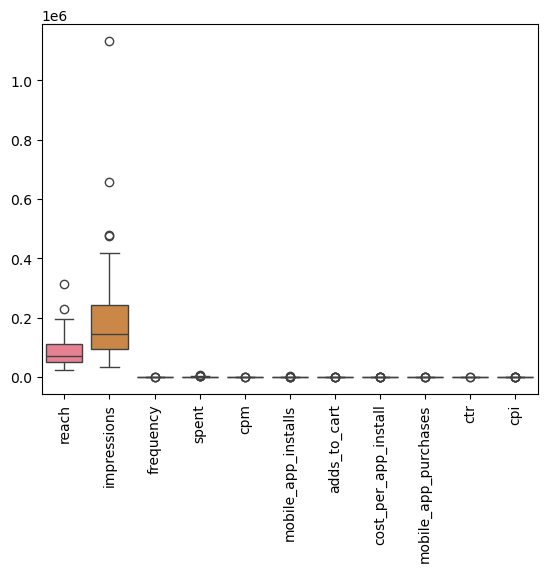

In [44]:
#create a boxplot to show the distribution of the data
sns.boxplot(data=creative_copy)
plt.xticks(rotation=90)

In [45]:
creative_copy.head()

,campaign_name,ad_set_name,ad_name,reach,impressions,frequency,spent,cpm,mobile_app_installs,adds_to_cart,cost_per_app_install,mobile_app_purchases,ctr,cpi
0,MAI - App Installs - DE - HH - iOS - AO - V02,16.01 - 50% - 1P data - AUTO - HH,DCO - VIDEO - Various - Jonas - APP - DE - V01,315265.0,1132242.0,3.591398,7703.36,6.803634,2136.0,189.0,3.606442,101.0,0.520472,3.606442
1,MAI - Installs - DE - CGN - iOS - Launch - V28...,CGN - V28.02.2023,Video-C2-V1-Laura-369-Deliverydoor-CGN,92735.0,417229.0,4.499154,3675.72,8.809838,725.0,166.0,5.069959,84.0,0.447236,5.069959
2,MAI - Installs - DE - CGN - Android - Launch -...,CGN - V28.02.2023,Video-C2-V1-Laura-369-Deliverydoor-CGN,51344.0,312964.0,6.095435,3614.52,11.549316,571.0,300.0,6.330158,48.0,0.415383,6.330158
3,MAI - Installs - DE - HH+CGN - iOS - AO - V25....,Videos - DCO | ALL CITIES,DCO - VIDEOS,194370.0,475482.0,2.446273,3569.15,7.506383,233.0,51.0,15.318240,29.0,0.204634,15.318240
4,AEO - Purchase - DE - HH+CGN - iOS - AO - V08....,08.03 - Various - 1P data - AUTO - HH,Video-C31-V2-Laura-369-50%,159773.0,366599.0,2.294499,3496.03,9.536387,454.0,40.0,7.700507,19.0,0.431261,7.700507


In [46]:
def classify_ads(df):
    """
    Classify ads as 'Good' or 'Bad' based on median thresholds
    """
    # Create a copy of dataframe
    df_classified = df.copy()
    
    # Define metrics and their desired direction
    metrics = {
        'cpm': 'lower',           # Lower is better
        'ctr': 'higher',          # Higher is better
        'cpi': 'lower',           # Lower is better
        'frequency': 'lower',     # Lower is better
        'cost_per_app_install': 'lower'  # Lower is better
    }
    
    # Calculate score for each metric
    for metric, direction in metrics.items():
        median = df[metric].median()
        
        if direction == 'lower':
            # For metrics where lower is better
            df_classified[f'{metric}_score'] = (df[metric] <= median).astype(int)
        else:
            # For metrics where higher is better
            df_classified[f'{metric}_score'] = (df[metric] >= median).astype(int)
    
    # Calculate overall score (average of individual scores)
    score_columns = [col for col in df_classified.columns if col.endswith('_score')]
    df_classified['total_score'] = df_classified[score_columns].mean(axis=1)
    
    # Classify as 'Good' if more than half of metrics are good
    df_classified['performance'] = df_classified['total_score'].apply(
        lambda x: 'Good' if x >= 0.5 else 'Bad'
    )
    
    # Add categorical color for easy visualization
    df_classified['performance_color'] = df_classified['performance'].map({
        'Good': 'green',
        'Bad': 'red'
    })
    
    return df_classified[['performance', 'performance_color'] + score_columns]

# Example usage:
if __name__ == "__main__":
    # Your DataFrame is already loaded as creative_copy
    results = classify_ads(creative_copy)
    
    # Combine with original data
    final_df = pd.concat([creative_copy, results], axis=1)
    
    # Print the thresholds used
    print("\nThresholds used for classification:")
    print("=" * 50)
    metrics = ['cpm', 'ctr', 'cpi', 'frequency', 'cost_per_app_install']
    for metric in metrics:
        median = creative_copy[metric].median()
        print(f"{metric}: {'≤' if metric != 'ctr' else '≥'} {median:.3f}")
    
    # Print summary of classifications
    print("\nClassification Summary:")
    print("=" * 50)
    print(final_df['performance'].value_counts())


Thresholds used for classification:
cpm: ≤ 7.535
ctr: ≥ 0.363
cpi: ≤ 9.789
frequency: ≤ 2.071
cost_per_app_install: ≤ 9.789

Classification Summary:
performance
Bad     39
Good    35
Name: count, dtype: int64


In [47]:
# Add performance classification
results = classify_ads(creative_copy)

# Add the new columns to your original dataframe
creative_copy['performance'] = results['performance']

# If you want to see the individual metric scores too:
creative_copy = pd.concat([creative_copy, results], axis=1)

In [48]:
creative_copy.head()

,campaign_name,ad_set_name,ad_name,reach,impressions,frequency,spent,cpm,mobile_app_installs,adds_to_cart,...,ctr,cpi,performance,performance,performance_color,cpm_score,ctr_score,cpi_score,frequency_score,cost_per_app_install_score
0,MAI - App Installs - DE - HH - iOS - AO - V02,16.01 - 50% - 1P data - AUTO - HH,DCO - VIDEO - Various - Jonas - APP - DE - V01,315265.0,1132242.0,3.591398,7703.36,6.803634,2136.0,189.0,...,0.520472,3.606442,Good,Good,green,1,1,1,0,1
1,MAI - Installs - DE - CGN - iOS - Launch - V28...,CGN - V28.02.2023,Video-C2-V1-Laura-369-Deliverydoor-CGN,92735.0,417229.0,4.499154,3675.72,8.809838,725.0,166.0,...,0.447236,5.069959,Good,Good,green,0,1,1,0,1
2,MAI - Installs - DE - CGN - Android - Launch -...,CGN - V28.02.2023,Video-C2-V1-Laura-369-Deliverydoor-CGN,51344.0,312964.0,6.095435,3614.52,11.549316,571.0,300.0,...,0.415383,6.330158,Good,Good,green,0,1,1,0,1
3,MAI - Installs - DE - HH+CGN - iOS - AO - V25....,Videos - DCO | ALL CITIES,DCO - VIDEOS,194370.0,475482.0,2.446273,3569.15,7.506383,233.0,51.0,...,0.204634,15.318240,Bad,Bad,red,1,0,0,0,0
4,AEO - Purchase - DE - HH+CGN - iOS - AO - V08....,08.03 - Various - 1P data - AUTO - HH,Video-C31-V2-Laura-369-50%,159773.0,366599.0,2.294499,3496.03,9.536387,454.0,40.0,...,0.431261,7.700507,Good,Good,green,0,1,1,0,1


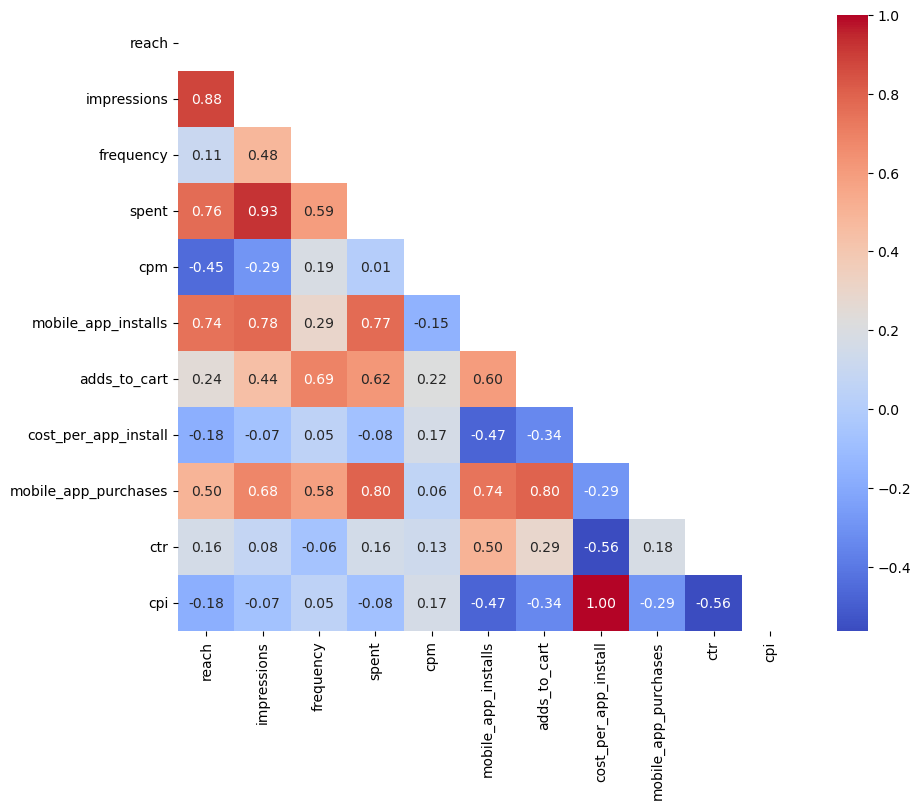

In [49]:
numeric_columns = creative_copy.select_dtypes(include=['float64']) # Select only numeric columns

mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool)) # Create a mask to hide the upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f")
plt.show()

In [50]:
creative_new = creative_copy.copy() # Create a copy of the dataframe

Encoding 

In [53]:
# Get all numerical columns
numerical_columns = creative_new.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns except performance_color
categorical_columns = creative_new.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'performance_color']

# Create dummy variables for categorical columns
encoded_columns = pd.get_dummies(creative_new[categorical_columns], dtype=int)

# Combine numerical columns, encoded categorical columns, and performance_color
creative_new_encoded = pd.concat([
    creative_new[numerical_columns],              # Numerical columns
    encoded_columns,                             # Encoded categorical columns
    creative_new['performance_color']            # Target variable
], axis=1)

# Preview the result
creative_new_encoded.head()

,reach,impressions,frequency,spent,cpm,mobile_app_installs,adds_to_cart,cost_per_app_install,mobile_app_purchases,ctr,...,ad_name_Video-C6-V1-Laura-369-Chatmanner,performance_Bad,performance_Good,performance_Bad,performance_Good,performance_Bad,performance_Good,performance_Bad,performance_Good,performance_color
0,315265.0,1132242.0,3.591398,7703.36,6.803634,2136.0,189.0,3.606442,101.0,0.520472,...,0,0,1,0,1,0,1,0,1,green
1,92735.0,417229.0,4.499154,3675.72,8.809838,725.0,166.0,5.069959,84.0,0.447236,...,0,0,1,0,1,0,1,0,1,green
2,51344.0,312964.0,6.095435,3614.52,11.549316,571.0,300.0,6.330158,48.0,0.415383,...,0,0,1,0,1,0,1,0,1,green
3,194370.0,475482.0,2.446273,3569.15,7.506383,233.0,51.0,15.318240,29.0,0.204634,...,0,1,0,1,0,1,0,1,0,red
4,159773.0,366599.0,2.294499,3496.03,9.536387,454.0,40.0,7.700507,19.0,0.431261,...,0,0,1,0,1,0,1,0,1,green


split data 

In [55]:
#import train_test_split and GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV

X = creative_new_encoded.drop('performance_color', axis=1) # Features
y = creative_new_encoded['performance_color'] # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
y_test.shape 

(23,)

In [57]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifier

#intialize the model
RF_model = RandomForestClassifier(random_state=42)

#fit the model
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

prediction 

In [58]:
preds = RF_model.predict(X_test)   # Predictions
X_test

,reach,impressions,frequency,spent,cpm,mobile_app_installs,adds_to_cart,cost_per_app_install,mobile_app_purchases,ctr,...,ad_name_Video-C6-V1-Jonas-369-StoryChat-download,ad_name_Video-C6-V1-Laura-369-Chatmanner,performance_Bad,performance_Good,performance_Bad,performance_Good,performance_Bad,performance_Good,performance_Bad,performance_Good
4,159773.0,366599.0,2.294499,3496.03,9.536387,454.0,40.0,7.700507,19.0,0.431261,...,0,0,0,1,0,1,0,1,0,1
63,44871.0,67464.0,1.503510,629.01,9.323639,64.0,8.0,9.828281,2.0,0.380944,...,0,0,1,0,1,0,1,0,1,0
18,153758.0,294789.0,1.917227,1703.59,5.779015,362.0,32.0,4.706050,17.0,0.340583,...,0,0,0,1,0,1,0,1,0,1
0,315265.0,1132242.0,3.591398,7703.36,6.803634,2136.0,189.0,3.606442,101.0,0.520472,...,0,0,0,1,0,1,0,1,0,1
28,51617.0,147216.0,2.852084,1368.68,9.297087,101.0,78.0,13.551287,10.0,0.232312,...,0,0,1,0,1,0,1,0,1,0
73,45618.0,73902.0,1.620018,506.76,6.857189,84.0,15.0,6.032857,6.0,0.381586,...,0,0,0,1,0,1,0,1,0,1
10,74657.0,243516.0,3.261797,2387.85,9.805721,224.0,178.0,10.660045,49.0,0.324003,...,0,0,1,0,1,0,1,0,1,0
34,96896.0,206326.0,2.129355,1142.25,5.536142,466.0,38.0,2.451180,1.0,0.611653,...,0,0,0,1,0,1,0,1,0,1
12,186464.0,418081.0,2.242154,2346.45,5.612429,948.0,86.0,2.475158,15.0,0.594382,...,0,0,0,1,0,1,0,1,0,1
55,54266.0,88428.0,1.629529,701.24,7.930067,20.0,1.0,35.062000,0.0,0.287239,...,0,0,1,0,1,0,1,0,1,0


In [59]:
y_test

4     green
63      red
18    green
0     green
28      red
73    green
10      red
34    green
12    green
55      red
65    green
31      red
9       red
45      red
5       red
22      red
57      red
50    green
33    green
39    green
70      red
16    green
35      red
Name: performance_color, dtype: object

In [60]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': preds
})
print("Method 1: Simple DataFrame Comparison")
print(comparison_df.head(10))
print("\n")

Method 1: Simple DataFrame Comparison
   Actual Predicted
4   green     green
63    red       red
18  green     green
0   green     green
28    red       red
73  green     green
10    red       red
34  green     green
12  green     green
55    red       red




In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, preds)    # Accuracy
print("Accuracy:", acc)

Accuracy: 1.0


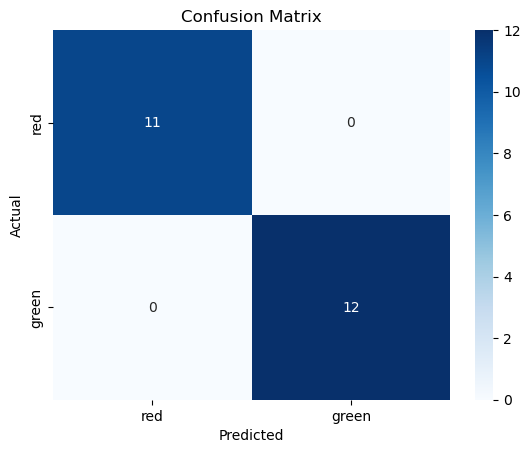

In [63]:
#create a confusion matrix
cm = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['red','green'],yticklabels=['red','green'], fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

